In [37]:
from pathlib import Path
import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sys
sys.path.append('..')

import training

In [38]:
df_all = pd.read_csv('../reports/training_hyperparameters/results.csv')

## Inspect training progression

In [39]:
def get_experiment(opt, lr, ams, exp):
    return df_all[(df_all['optimizer'] == opt) & (df_all['learning_rate'] == lr) & 
                  (df_all['amsgrad'] == ams) & (df_all['exponential_decay'] == exp)]

def plot_experiment(experiment, ax=None, title=None):
    if not ax:
        ax = plt.subplot(111)
    for n in range(4):
        tmp = experiment[experiment['num'] == n]
        base = tmp[~tmp['ensemble']].dropna()
        ax.plot(range(1, 16), base['smape'], c='0.5', alpha=0.5)
        ens = tmp[tmp['ensemble']].dropna()
        ax.plot(range(1, 16), ens['smape'], c='C0', alpha=0.5)
        ax.scatter([15], list(experiment[experiment['epoch'].isna()]['smape']), c='C1', marker='x')
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.set_title(title)

In [45]:
adam_comb_dict = {'optimizer': ['adam'],
                  'learning_rate': [0.0001, 0.0005, 0.001, 0.005],
                  'amsgrad': [True, False],
                  'exp_decay': [True, False]}

combs = list(training.make_runs(adam_comb_dict))

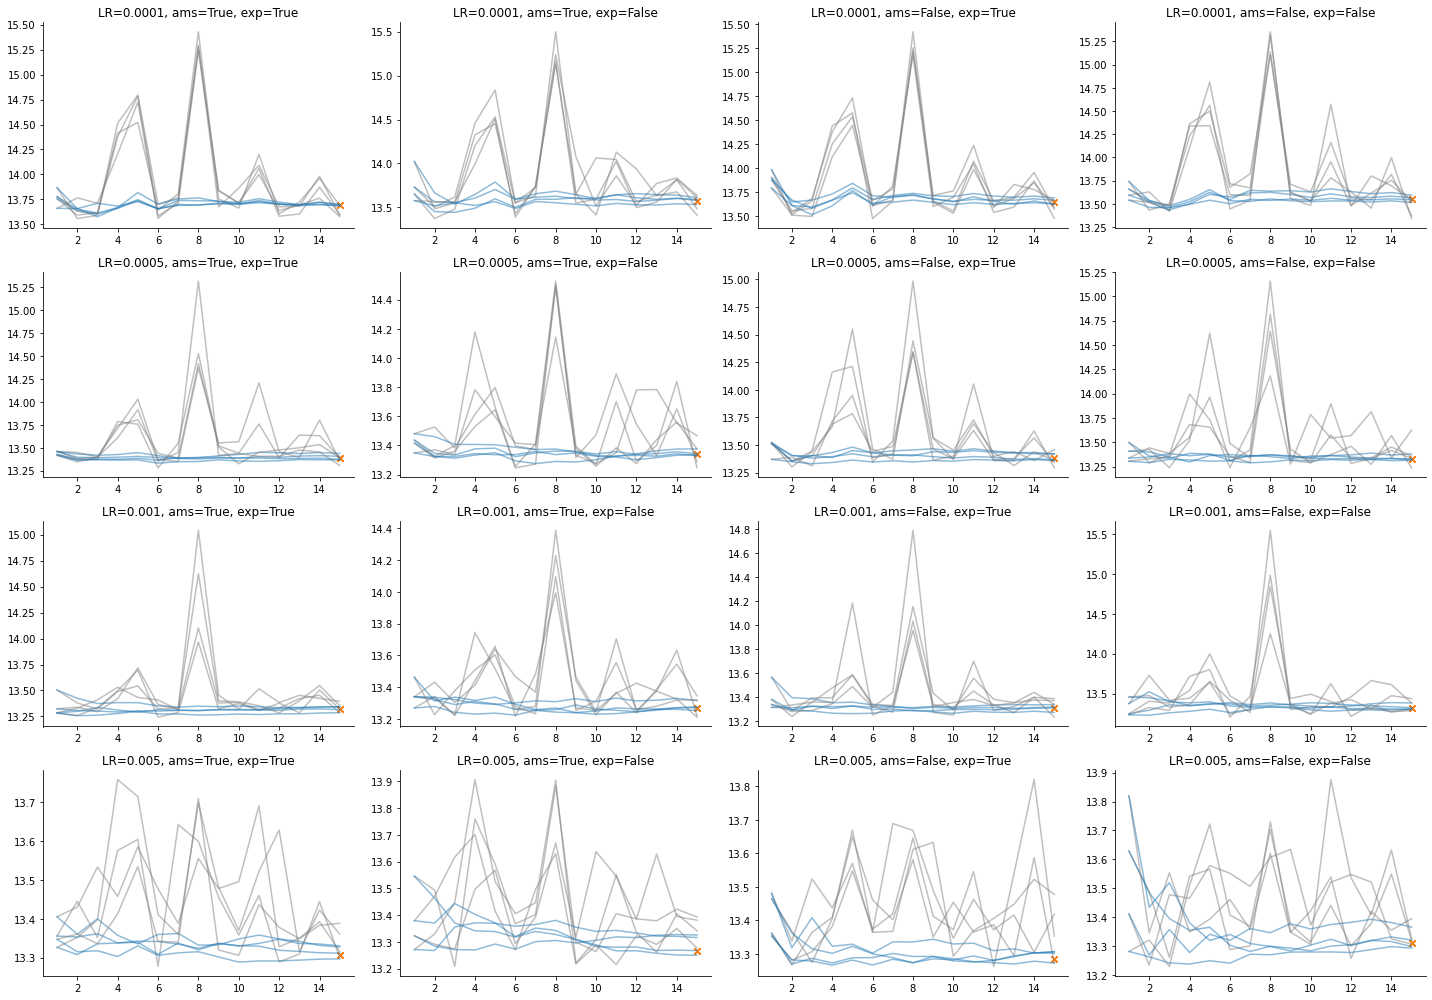

In [47]:
plt.figure(figsize=(20, 14))

for i in range(16):
    ax = plt.subplot(4, 4, i+1)
    opt = combs[i]['optimizer']
    lr = combs[i]['learning_rate']
    ams = combs[i]['amsgrad']
    exp = combs[i]['exp_decay']
    ex = get_experiment(opt, lr, ams, exp)
    title = 'LR={}, ams={}, exp={}'.format(lr, ams, exp)
    plot_experiment(ex, ax=ax, title=title)
    
plt.tight_layout()

In [49]:
df_all[df_all['ensemble']].sort_values('smape')

,optimizer,learning_rate,amsgrad,exponential_decay,num,epoch,ensemble,smape,mase*
2032,adam,0.0050,True,False,NaN,8.0,True,13.204944,2.689074
1489,adam,0.0010,True,False,NaN,9.0,True,13.224161,2.691448
1371,adam,0.0010,True,False,0.0,6.0,True,13.224768,2.688789
1121,adam,0.0010,False,False,3.0,2.0,True,13.227863,2.682623
1379,adam,0.0010,True,False,0.0,10.0,True,13.230313,2.686847
...,...,...,...,...,...,...,...,...,...
1215,adam,0.0010,False,False,NaN,7.0,True,14.895783,3.105950
127,adam,0.0001,False,False,NaN,7.0,True,15.216990,3.045638
399,adam,0.0001,True,False,NaN,7.0,True,15.225835,3.044822
263,adam,0.0001,False,True,NaN,7.0,True,15.252378,3.052903
